 # Project: SuperMarket Sales # 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
sales = pd.read_csv(r'C:\Users\lvall\OneDrive\Documentos\JAUME\Curs Business Analytics\Projectes\sales.csv', delimiter = ',')

In [122]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [123]:
sales.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


In [124]:
# Add another column with the net price (total price without taxes) #

sales['net_price'] = sales['unit_price']*sales['quantity']
sales.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points,net_price
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1,16.5
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0,27.5
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1,18.0
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0,39.0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2,24.5


In [125]:
# Rename columns#

sales = sales.rename(columns = {'total_price':'gross_sales', 'net_price':'net_sales'})

sales.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,gross_sales,reward_points,net_sales
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1,16.5
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0,27.5
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1,18.0
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0,39.0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2,24.5


# Exploratory Analysis #

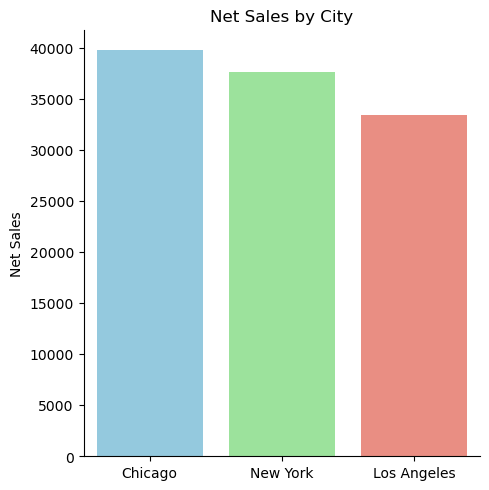

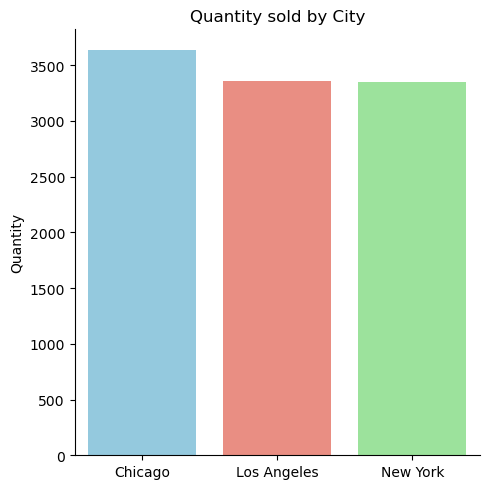

In [127]:
# What is the most succesful city in terms of net sales and quantity sold? #

net_sales_city = sales.groupby('city')['net_sales'].sum().sort_values(ascending = False).reset_index()
quantity_city = sales.groupby('city')['quantity'].sum().sort_values(ascending = False).reset_index()

city_colors = {'Chicago':'skyblue', 'New York':'lightgreen', 'Los Angeles':'salmon'}

sns.catplot(data=net_sales_city, x='city', y='net_sales', kind='bar', hue='city', palette = city_colors)
plt.title('Net Sales by City')
plt.ylabel('Net Sales')
plt.xlabel('')

sns.catplot(data=quantity_city, x='city', y='quantity', kind='bar', hue='city', palette = city_colors)
plt.title('Quantity sold by City')
plt.ylabel('Quantity')
plt.xlabel('')

plt.tight_layout()
plt.show()

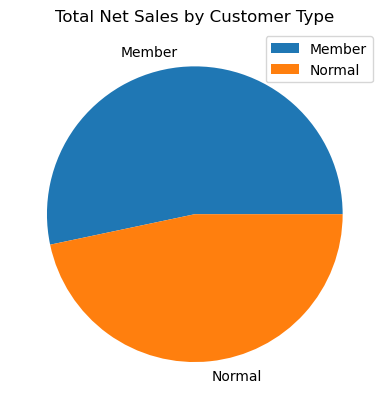

In [128]:
# What is the share of net sales by different type of costumers? #

sales_cust = sales.groupby('customer_type')['net_sales'].sum() / sales['net_sales'].sum()
sales_cust = pd.DataFrame(sales_cust)

sales_cust.plot(y='net_sales', kind='pie')
plt.title('Total Net Sales by Customer Type')
plt.ylabel("")

plt.show()

In [129]:
# Do member customers tend to spend more on average? #

avg_sale_cust = sales.groupby('customer_type')['net_sales'].mean()
avg_sale_cust

customer_type
Member    114.492326
Normal    106.917045
Name: net_sales, dtype: float64

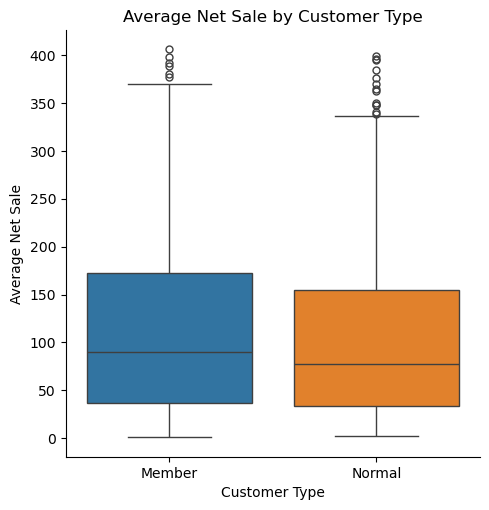

In [130]:
sns.catplot(data=sales, x='customer_type', y='net_sales', kind='box', hue='customer_type')

plt.title('Average Net Sale by Customer Type')
plt.ylabel('Average Net Sale')
plt.xlabel('Customer Type')

plt.show()

In [131]:
# Which are the most popular products? #

pop_products = sales.groupby('product_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
pop_products['% quantity'] = pop_products['quantity'] / pop_products['quantity'].sum() * 100

pop_products

,product_name,quantity,% quantity
4,Shampoo,2238,21.650382
3,Orange Juice,2183,21.118313
2,Notebook,2165,20.944181
1,Detergent,2010,19.444713
0,Apple,1741,16.842411


In [132]:
# Which are the most expensive products on average? #

exp_products = sales.groupby('product_name')['unit_price'].mean()

exp_products.reset_index()

,product_name,unit_price
0,Apple,10.844865
1,Detergent,10.356138
2,Notebook,10.426701
3,Orange Juice,10.732163
4,Shampoo,11.684955


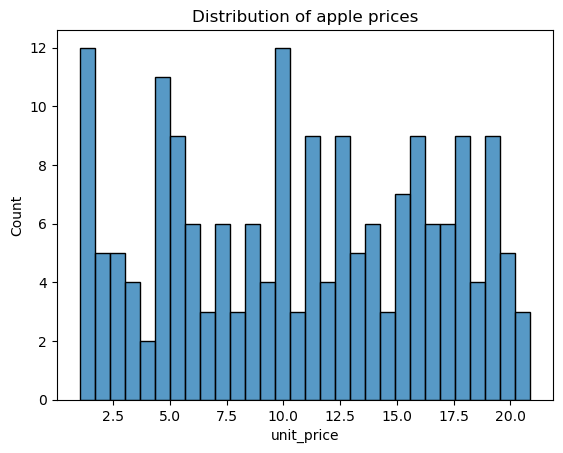

In [133]:
# Unit prices in this dataset are not very realistic #

apples = sales[sales['product_name']=='Apple']

plt.title('Distribution of apple prices')
sns.histplot(data=apples, x='unit_price', bins=30)
plt.show()

In [134]:
apples[['product_name','unit_price']].sort_values(by='unit_price', ascending=False).head()

,product_name,unit_price
112,Apple,20.89
553,Apple,20.87
760,Apple,20.74
310,Apple,20.18
586,Apple,19.99


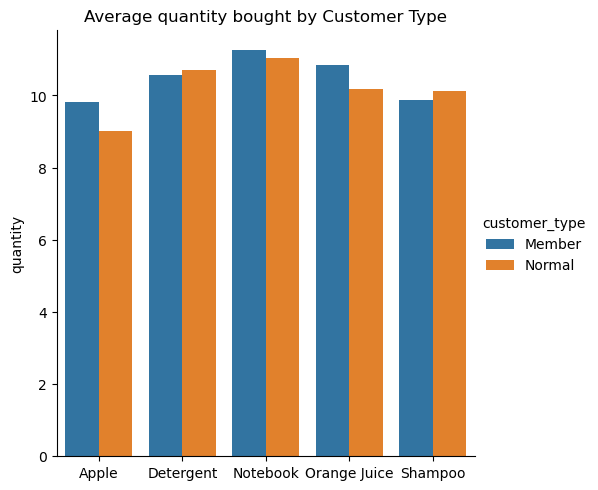

In [135]:
# Is there a different shopping pattern between different types of customers? #

avg_products = sales.groupby(['customer_type','product_name'])['quantity'].mean().reset_index()

sns.catplot(data=avg_products, x='product_name', y='quantity', hue='customer_type', kind='bar')
plt.title('Average quantity bought by Customer Type')
plt.xlabel('')

plt.show()

In [136]:
# Higher expenditure on apples and orange juice is associated with a more generous reward points policy? #

member_sales = sales[sales['customer_type']=='Member']
avg_points = member_sales.groupby('product_name')['reward_points'].mean().reset_index()
avg_points = avg_points.rename(columns = {'reward_points':'average_reward_points'})

avg_points

,product_name,average_reward_points
0,Apple,10.117021
1,Detergent,11.666667
2,Notebook,12.323810
3,Orange Juice,12.323529
4,Shampoo,12.058824


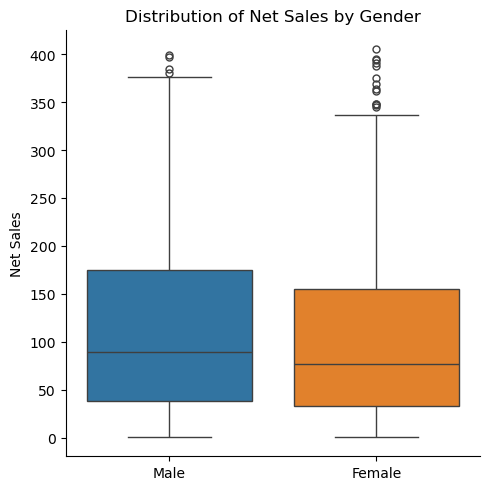

In [137]:
# Is the average expenditure similar between males and females?

sns.catplot(data=sales, x='gender', y='net_sales', kind='box', hue='gender')
plt.title('Distribution of Net Sales by Gender')
plt.xlabel('')
plt.ylabel('Net Sales')

plt.show()

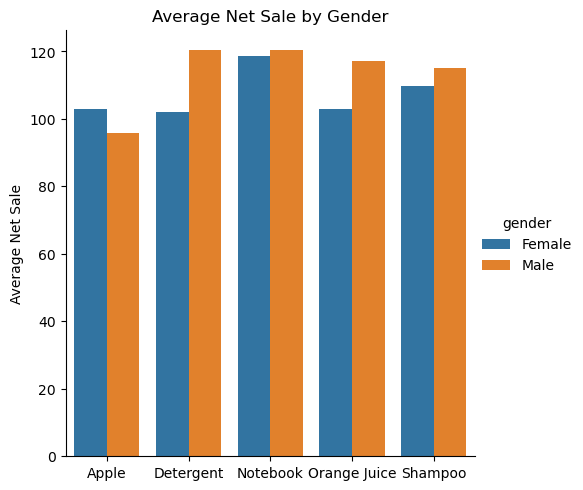

In [138]:
# In which products males tend to spend more on average than females?

sales_gender = sales.groupby(['gender','product_name'])['net_sales'].mean().reset_index()

sns.catplot(data=sales_gender, x='product_name', y='net_sales', hue='gender', kind='bar')
plt.title('Average Net Sale by Gender')
plt.xlabel('')
plt.ylabel('Average Net Sale')

plt.show()

In [139]:
# Which city has a more agressive "reward points" strategy?

city_points = sales.groupby('city')['reward_points'].sum().reset_index()

city_points['% reward points'] = city_points['reward_points'] / city_points['reward_points'].sum() * 100

city_points

,city,reward_points,% reward points
0,Chicago,2284,37.708437
1,Los Angeles,1712,28.264818
2,New York,2061,34.026746


In [140]:
# Could different 'reward points' strategies across cities be justified by a higher share of their net sales? 

city_sales = sales.groupby('city')['net_sales'].sum().reset_index()

city_sales['% net sales'] = city_sales['net_sales'] / city_sales['net_sales'].sum() * 100

city_sales

,city,net_sales,% net sales
0,Chicago,39798.69,35.911004
1,Los Angeles,33432.02,30.166254
2,New York,37595.18,33.922741


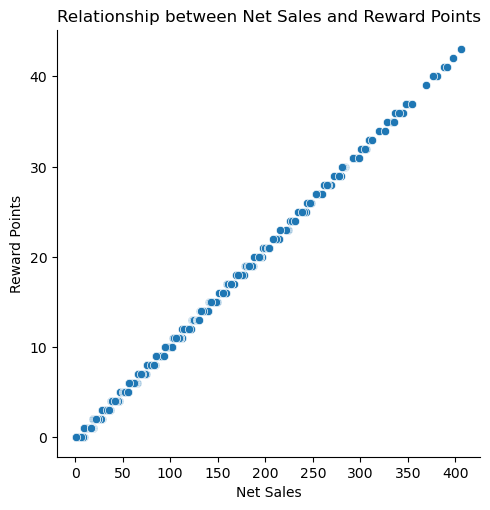

In [141]:
# What type of relationship exist between Net Sales and Reward Points?   

sns.relplot(data=member_sales, x='net_sales', y='reward_points', kind='scatter')
plt.title('Relationship between Net Sales and Reward Points')
plt.xlabel('Net Sales')
plt.ylabel('Reward Points')

plt.show()

# Conclusions 

In [ ]:
# 1 --> Average spending for member customers is higher than non-members. 
# This is explained by a different pattern in food purchases (apples and orange juice). 

# 2 --> Males tend to spend more than females on average. 
# This trend is due to the fact that males spend more or detergent and orange juice. Women have a higher price elasticity for those products? 

# 3 --> Average spending for member customers is higher than non-members. 
# This is explained by a different pattern in food purchases (apples and orange juice). 

# 4 --> Chicago seems to have the most agressive strategy in terms of points rewards (the share of points given to customers is above its relative net sales) 
# Is this strategy hurting profitability of the firm? Does point rewards lead to a higher customer expenditure? 

# 5 -->  Net sales and reward points have a positive linear relationship. Should another type of strategy be considered (exponential relationship)?  
# Does point rewards lead to a higher customer expenditure and profitability? More in-depth analysis is needed.